In [1]:
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
# 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd


Dispersion relation information


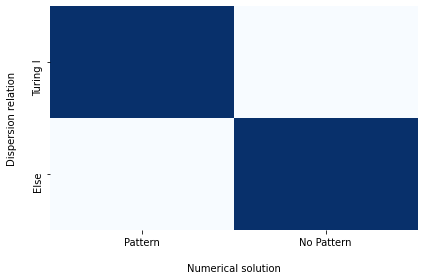

In [2]:

cf_matrix_scholes = np.array([[1,0],[0,1]])
ax = sns.heatmap(cf_matrix_scholes, annot=False, cmap='Blues',cbar=False)

ax.set_xlabel('\nNumerical solution')
ax.set_ylabel('Dispersion relation\n');

## Ticket labels - List must be in alphabetical order
ax.yaxis.set_ticklabels(['Turing I','Else'])
ax.xaxis.set_ticklabels(['Pattern','No Pattern'])

## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.savefig('cf_scholes')
print('Dispersion relation information')
plt.show()


Numerical information


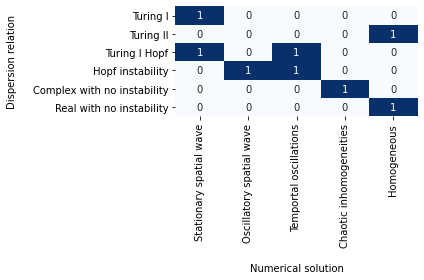

In [3]:


cf_matrix_marti = np.array([[1,0,0,0,0],[0,0,0,0,1],[1,0,1,0,0],[0,1,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
ax = sns.heatmap(cf_matrix_marti, annot=True, cmap='Blues',cbar=False)

ax.set_xlabel('\nNumerical solution')
ax.set_ylabel('Dispersion relation\n');

## Ticket labels - List must be in alphabetical order
ax.yaxis.set_ticklabels(['Turing I','Turing II', 'Turing I Hopf', 'Hopf instability', 'Complex with no instability', 'Real with no instability'], rotation=0)
ax.xaxis.set_ticklabels(['Stationary spatial wave','Oscillatory spatial wave', 'Temportal oscillations', 'Chaotic inhomogeneities', 'Homogeneous'], rotation=90)
## Display the visualization of the Confusion Matrix.
plt.tight_layout()
# plt.savefig('cf_marti')
print('Numerical information')
plt.show()




Numerical information


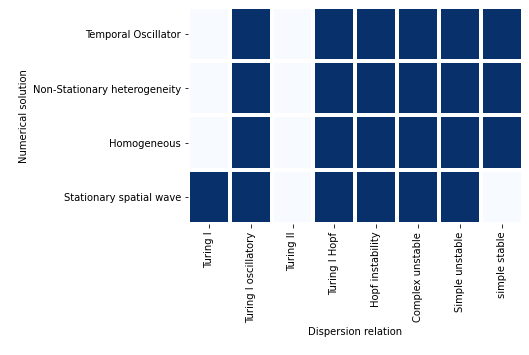

In [4]:


cf_matrix_marti2 = np.array([[0,1,0,1,1,1,1,1],[0,1,0,1,1,1,1,1],[0,1,0,1,1,1,1,1],[1,1,0,1,1,1,1,0]])
ax = sns.heatmap(cf_matrix_marti2, linewidths=4,annot=False, cmap='Blues',cbar=False)

ax.set_ylabel('\nNumerical solution')
ax.set_xlabel('Dispersion relation\n');
pattern_list = ['Temporal Oscillator', 'Non-Stationary heterogeneity','Homogeneous', 'Stationary spatial wave']

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Turing I','Turing I oscillatory','Turing II', 'Turing I Hopf', 'Hopf instability', 'Complex unstable', 'Simple unstable', 'simple stable'], rotation=90)
ax.yaxis.set_ticklabels(pattern_list, rotation=0)
## Display the visualization of the Confusion Matrix.
# plt.tight_layout()
# plt.savefig('cf_marti')
print('Numerical information')
plt.show()




In [5]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'
L=50; dx =1; J = int(L/dx)
T =3000; dt = 0.05; N = int(T/dt)
boundaryCoeff=2;rate=0.01
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
n_param_sets=2000000
pattern_df = pickle.load(open( modellingpath + '/growth/out/patternAnalysis/%s/%s/pattern/pattern_df_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), 'rb'))


In [6]:
pattern_df['pattern'].value_counts(normalize=True)
# pattern_df['pattern'].unique()

Homogeneous                     0.696242
Temporal Oscillator             0.175426
Non-Stationary heterogeneity    0.126447
Stationary spatial wave         0.001886
Name: pattern, dtype: float64

Numerical information


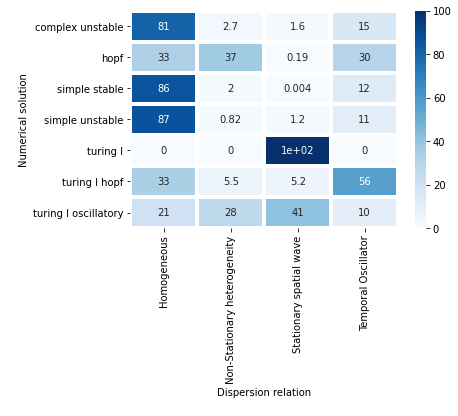

In [7]:

df_confusion = pd.crosstab( pattern_df['system_class'], pattern_df['pattern'], normalize='index')*100
df_confusion
# cf_matrix_marti2 = np.array([[0,1,0,1,1,1,1,1],[0,1,0,1,1,1,1,1],[0,1,0,1,1,1,1,1],[1,1,0,1,1,1,1,0]])
ax = sns.heatmap(df_confusion, linewidths=4,annot=True, cmap='Blues',cbar=True)

ax.set_ylabel('\nNumerical solution')
ax.set_xlabel('Dispersion relation\n');
# pattern_list = ['Temporal Oscillator', 'Non-Stationary heterogeneity','Homogeneous', 'Stationary spatial wave']

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Turing I','Turing I oscillatory','Turing II', 'Turing I Hopf', 'Hopf instability', 'Complex unstable', 'Simple unstable', 'simple stable'], rotation=90)
# ax.yaxis.set_ticklabels(pattern_list, rotation=0)
## Display the visualization of the Confusion Matrix.
# plt.tight_layout()
# plt.savefig('cf_marti')
print('Numerical information')
plt.show()



In [8]:
import matplotlib
matplotlib.__version__

'3.6.2'

In [9]:
pattern_list = ['Temporal Oscillator', 'Non-Stationary heterogeneity','Homogeneous', 'Stationary spatial wave']
# for pattern in lsa_df['pattern'].unique() :
for pattern in pattern_list :
    print(pattern)
    print(pattern_df[pattern_df['pattern']==pattern]['system_class'].value_counts())
    print('-------------------------------------------')


Temporal Oscillator
hopf                    18380
simple stable           14810
simple unstable           975
complex unstable          776
turing I hopf             586
turing I oscillatory        3
Name: system_class, dtype: int64
-------------------------------------------
Non-Stationary heterogeneity
hopf                    22885
simple stable            2447
complex unstable          138
simple unstable            74
turing I hopf              58
turing I oscillatory        8
Name: system_class, dtype: int64
-------------------------------------------
Homogeneous
simple stable           108203
hopf                     20510
simple unstable           7832
complex unstable          4114
turing I hopf              349
turing I oscillatory         6
Name: system_class, dtype: int64
-------------------------------------------
Stationary spatial wave
hopf                    115
simple unstable         112
complex unstable         82
turing I hopf            54
turing I oscillatory     1